In [0]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
from pandas import DataFrame 
from sklearn import datasets 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 

In [11]:
!pip install pyamg

In [12]:
X = pd.read_csv('reduced_df.csv') 

  
# Dropping the CUST_ID column from the data 
  
# Handling the missing values 
X.fillna(method ='ffill', inplace = True) 
  
print(X.head()) 

   Unnamed: 0  BALANCE_FREQUENCY  ONEOFF_PURCHASES  ...  installment  none  one_off
0           0           0.597837          0.000000  ...            1     0        0
1           1           0.646627          0.000000  ...            0     1        0
2           2           0.693147          6.651791  ...            0     0        1
3           3           0.492477          7.313220  ...            0     0        1
4           4           0.693147          2.833213  ...            0     0        1

[5 rows x 18 columns]


In [0]:
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(X) 
  
# Normalizing the data so that  
# the data approximately follows a Gaussian distribution 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 

In [14]:
pca = PCA(n_components = 5) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2','P3','P4','P5'] 
print(X_principal.head()) 

         P1        P2        P3        P4        P5
0  0.056811  0.615722  0.279367 -0.009008  0.259617
1  0.873206 -0.034449 -0.184796  0.268683  0.135682
2 -0.192561 -0.508472  0.506714 -0.379634  0.131159
3  0.314447 -0.366759  0.527698 -0.265992  0.032511
4  0.418327 -0.159671  0.557747 -0.297372  0.373932


In [15]:
from sklearn import metrics
from sklearn.metrics import calinski_harabaz_score,silhouette_score
final_sil_score =0
for aff in ['nearest_neighbors','rbf']:
  for n in [4,5]:
    spectral_model_rbf = SpectralClustering(n_clusters = n, affinity =aff,n_neighbors=150) 
  
# Training the model and Storing the predicted cluster labels 
    labels = spectral_model_rbf.fit_predict(X_principal)


    best_sil_score=silhouette_score(X_principal,labels)
    if best_sil_score > final_sil_score:
      final_sil_score=best_sil_score
    best_cal_score=calinski_harabaz_score(X_principal,labels)
    print('Silhouette Score for {} and n value {} is {}'.format(aff,n,best_sil_score))
    print('Calinski_harabaz Score for {} and n value {} is {}'.format(aff,n,best_cal_score))
print('The best score is {}'.format(final_sil_score))  

/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


Silhouette Score for nearest_neighbors and n value 4 is 0.46902710399233727
Calinski_harabaz Score for nearest_neighbors and n value 4 is 6472.970087583754


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


Silhouette Score for nearest_neighbors and n value 5 is 0.45523167957741656
Calinski_harabaz Score for nearest_neighbors and n value 5 is 6214.341969184101


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


Silhouette Score for rbf and n value 4 is 0.4685567179795955
Calinski_harabaz Score for rbf and n value 4 is 6513.475850810002
Silhouette Score for rbf and n value 5 is 0.4616442198786783
Calinski_harabaz Score for rbf and n value 5 is 6003.459569049262
The best score is 0.46902710399233727


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


We find that , its best performing for Affic as nearest neighbours and Number of clusters 4


In [16]:
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels = spectral_model_rbf.fit_predict(X_principal)

/usr/local/lib/python3.6/dist-packages/sklearn/manifold/_spectral_embedding.py:236: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn("Graph is not fully connected, spectral embedding"


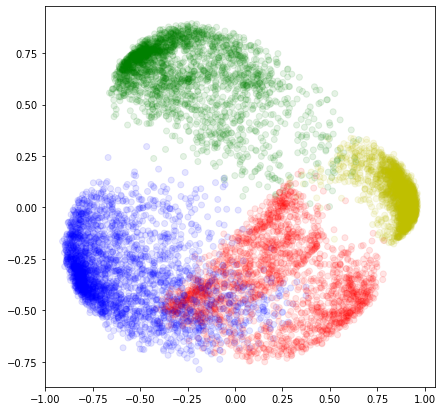

In [17]:
color_map={0:'r',1:'b',2:'g',3:'y',4:'purple'}
label_color=[color_map[l] for l in labels]
plt.figure(figsize=(7,7))
plt.scatter(x='P1',y='P2',c=label_color,cmap='Spectral',alpha=0.1,data=X_principal)

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


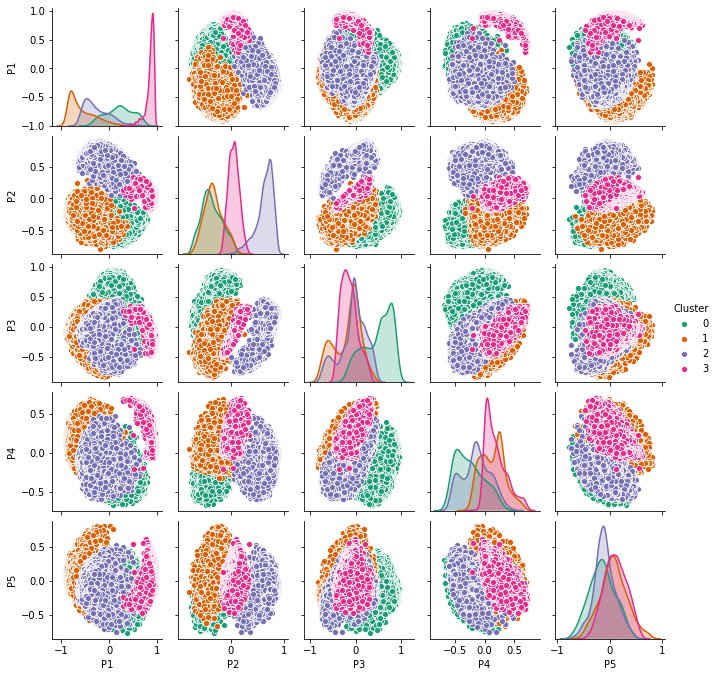

In [18]:
import seaborn as sns
df_pair_plot=pd.DataFrame(X_principal)
df_pair_plot['Cluster']=labels
df_pair_plot.head()
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [0]:
credit=pd.read_csv('credit.csv')
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]] 
cr_pre.describe()
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(labels,name='Cluster_5')],axis=1)

In [20]:
print(set(cluster_df_4['Cluster_5']))

{0, 1, 2, 3}


In [21]:
cluster_4=cluster_df_4.groupby('Cluster_5')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_5,0,1,2,3
PURCHASES_TRX,7.109925,32.959625,11.900885,0.001469
Monthly_avg_purchase,69.688958,192.685172,46.974347,0.000000
Monthly_cash_advance,78.995966,67.821985,38.398206,182.858169
limit_usage,0.381074,0.353548,0.271678,0.573771
CASH_ADVANCE_TRX,2.932231,2.832733,1.265487,6.299706
payment_minpay,5.571082,7.236982,13.259004,10.087451
both_oneoff_installment,0.000000,1.000000,0.000000,0.000000
installment,0.000000,0.000000,1.000000,0.000000
one_off,1.000000,0.000000,0.000000,0.000000
none,0.000000,0.000000,0.000000,1.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


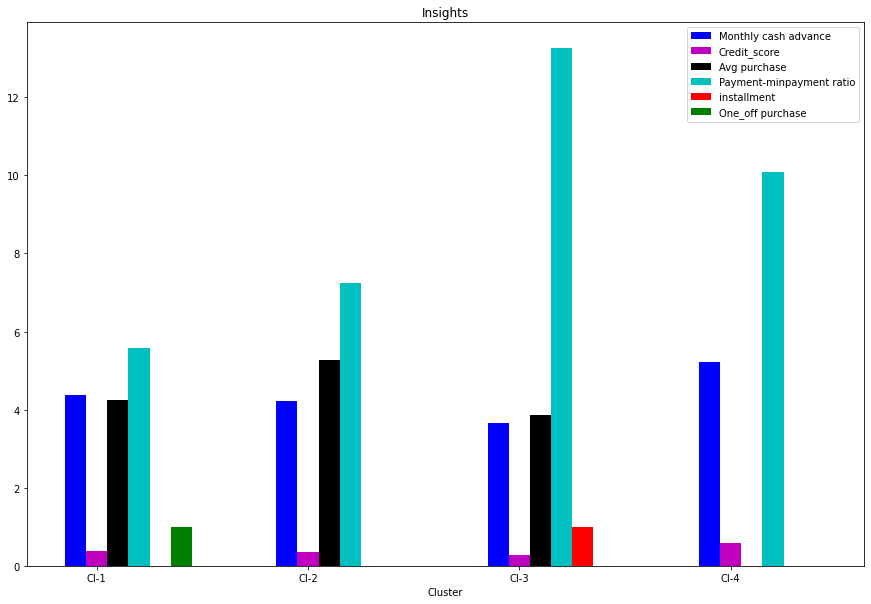

In [22]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-1', 'Cl-2', 'Cl-3', 'Cl-4'))
plt.legend()

In [0]:
spectral_model_rbf = SpectralClustering(n_clusters = 4, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels = spectral_model_rbf.fit_predict(X_principal)

In [24]:
best_sil_score=silhouette_score(X_principal,labels)
print('Silhouette Score for {} and n value {} is {}'.format(aff,n,best_sil_score))

Silhouette Score for rbf and n value 5 is 0.6053984667674023


/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:2071: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


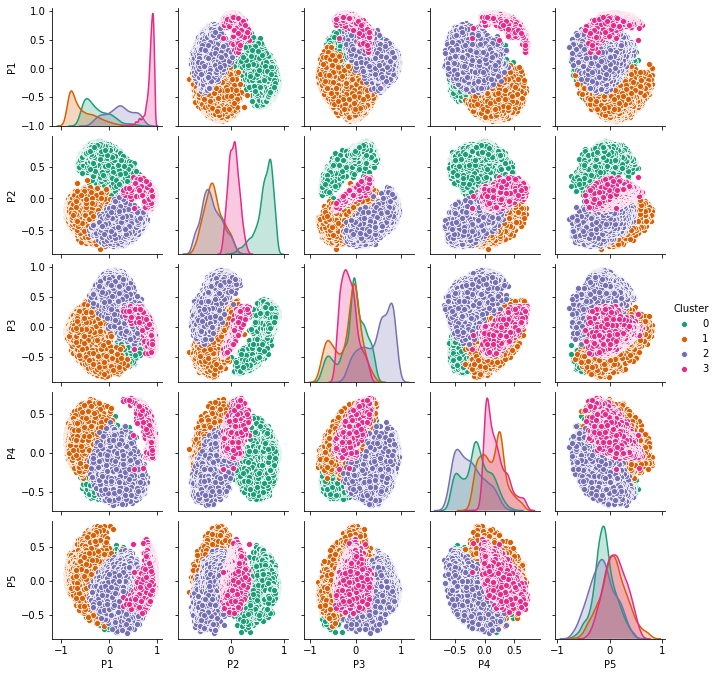

In [25]:
import seaborn as sns
df_pair_plot=pd.DataFrame(X_principal)
df_pair_plot['Cluster']=labels
df_pair_plot.head()
sns.pairplot(df_pair_plot,hue='Cluster', palette= 'Dark2', diag_kind='kde',size=1.85)

In [26]:
from sklearn import metrics
from sklearn.metrics import calinski_harabaz_score,silhouette_score
best_sil_score=silhouette_score(X_principal,labels)
best_cal_score=calinski_harabaz_score(X_principal,labels)
print('Silhouette Score is {}'.format(best_sil_score))
print('Calinski_harabaz Score is {}'.format(best_cal_score))

Silhouette Score is 0.5960038266334255
Calinski_harabaz Score is 20228.02521034533


/usr/local/lib/python3.6/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function calinski_harabaz_score is deprecated; Function 'calinski_harabaz_score' has been renamed to 'calinski_harabasz_score' and will be removed in version 0.23.
  warnings.warn(msg, category=FutureWarning)


In [0]:
credit=pd.read_csv('credit.csv')
col=['BALANCE','PURCHASES','CASH_ADVANCE','TENURE','PAYMENTS','MINIMUM_PAYMENTS','PRC_FULL_PAYMENT','CREDIT_LIMIT']
col_kpi=['PURCHASES_TRX','Monthly_avg_purchase','Monthly_cash_advance','limit_usage','CASH_ADVANCE_TRX',
         'payment_minpay','both_oneoff_installment','installment','one_off','none','CREDIT_LIMIT']
cre_original=pd.concat([credit,pd.get_dummies(credit['purchase_type'])],axis=1)
cr_log=credit.drop(['CUST_ID','purchase_type'],axis=1).applymap(lambda x: np.log(x+1))

cr_pre=cr_log[[x for x in cr_log.columns if x not in col ]] 
cr_pre.describe()
cluster_df_4=pd.concat([cre_original[col_kpi],pd.Series(labels,name='Cluster_4')],axis=1)

In [28]:
print(set(cluster_df_4['Cluster_4']))

{0, 1, 2, 3}


In [29]:
cluster_4=cluster_df_4.groupby('Cluster_4')\
.apply(lambda x: x[col_kpi].mean()).T
cluster_4

Cluster_4,0,1,2,3
PURCHASES_TRX,11.900885,32.959625,7.109925,0.001469
Monthly_avg_purchase,46.974347,192.685172,69.688958,0.000000
Monthly_cash_advance,38.398206,67.821985,78.995966,182.858169
limit_usage,0.271678,0.353548,0.381074,0.573771
CASH_ADVANCE_TRX,1.265487,2.832733,2.932231,6.299706
payment_minpay,13.259004,7.236982,5.571082,10.087451
both_oneoff_installment,0.000000,1.000000,0.000000,0.000000
installment,1.000000,0.000000,0.000000,0.000000
one_off,0.000000,0.000000,1.000000,0.000000
none,0.000000,0.000000,0.000000,1.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


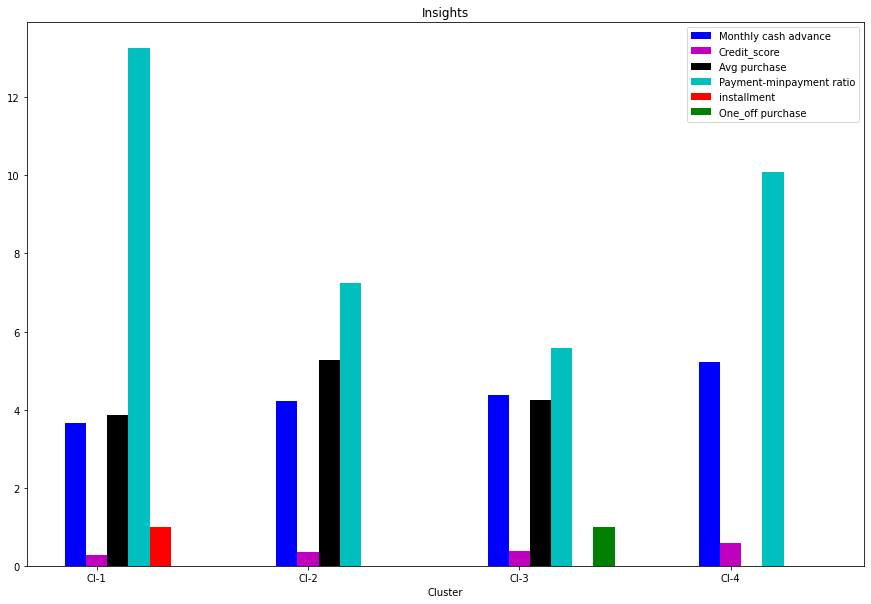

In [30]:
fig,ax=plt.subplots(figsize=(15,10))
index=np.arange(len(cluster_4.columns))

cash_advance=np.log(cluster_4.loc['Monthly_cash_advance',:].values)
credit_score=(cluster_4.loc['limit_usage',:].values)
purchase= np.log(cluster_4.loc['Monthly_avg_purchase',:].values)
payment=cluster_4.loc['payment_minpay',:].values
installment=cluster_4.loc['installment',:].values
one_off=cluster_4.loc['one_off',:].values


bar_width=.10
b1=plt.bar(index,cash_advance,color='b',label='Monthly cash advance',width=bar_width)
b2=plt.bar(index+bar_width,credit_score,color='m',label='Credit_score',width=bar_width)
b3=plt.bar(index+2*bar_width,purchase,color='k',label='Avg purchase',width=bar_width)
b4=plt.bar(index+3*bar_width,payment,color='c',label='Payment-minpayment ratio',width=bar_width)
b5=plt.bar(index+4*bar_width,installment,color='r',label='installment',width=bar_width)
b6=plt.bar(index+5*bar_width,one_off,color='g',label='One_off purchase',width=bar_width)

plt.xlabel("Cluster")
plt.title("Insights")
plt.xticks(index + bar_width, ('Cl-1', 'Cl-2', 'Cl-3', 'Cl-4'))
plt.legend()